<a href="https://colab.research.google.com/github/Mounika-Gummidi/project/blob/main/Tumor_vision_ai_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mounikagummidi","key":"1eecdc6e7fed3c4e500ece84f1113ed8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets list

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mosapabdelghany/medical-insurance-cost-dataset             Medical Insurance Cost Dataset                        16425  2025-08-24 11:54:36.533000           6144        120  1.0              
yashdevladdha/uber-ride-analytics-dashboard                Uber Data Analytics Dashboard                      17324552  2025-08-08 11:13:42.920000          50649       1119  1.0              
zadafiyabhrami/global-crocodile-species-dataset            Global Crocodile Species Dataset                      57473  2025-08-26 08:46:11.950000           4520        132  1.0              
codebynadiia/gdp-per-country-20202025   

In [5]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip brain-tumor-classification-mri.zip -d brain_tumor_classification


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
  0% 0.00/86.8M [00:00<?, ?B/s]
100% 86.8M/86.8M [00:00<00:00, 1.40GB/s]
Archive:  brain-tumor-classification-mri.zip
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(1).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(10).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(100).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(11).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(12).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(13).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(14).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(15).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(16).jpg  
  inflating: brain_tumor_classification/Testing/glioma_tumor/image(17).jpg  
  infl

In [7]:
import os
print(os.listdir("/content/brain_tumor_classification"))


['Testing', 'Training']


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    "/content/brain_tumor_classification/Training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = datagen.flow_from_directory(
    "/content/brain_tumor_classification/Testing",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load Pretrained ResNet50 (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base layers (so pretrained weights don’t change much initially)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)   # prevent overfitting
predictions = Dense(4, activation="softmax")(x)  # 4 classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")


NameError: name 'train_data' is not defined

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load Pretrained ResNet50 (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base layers (so pretrained weights don’t change much initially)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)   # prevent overfitting
predictions = Dense(4, activation="softmax")(x)  # 4 classes

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 28s 251ms/step - accuracy: 0.3119 - loss: 1.4928 - val_accuracy: 0.3578 - val_loss: 1.2799
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.4256 - loss: 1.2290 - val_accuracy: 0.4328 - val_loss: 1.2514
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4370 - loss: 1.1953 - val_accuracy: 0.4921 - val_loss: 1.2180
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.4990 - loss: 1.1585 - val_accuracy: 0.3578 - val_loss: 1.2220
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5335 - loss: 1.0962 - val_accuracy: 0.5113 - val_loss: 1.1694
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.5778 - loss: 1.0402 - val_accuracy: 0.5044 - val_loss: 1.1747
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.5789 - loss: 1.0188 - val_accuracy: 0.4293 - val_loss: 1.1623
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.5793 - loss: 1.0095 - val_accuracy: 0

In [14]:
import os
print(os.listdir("/content/"))

['.config', 'kaggle.json', 'brain-tumor-classification-mri.zip', 'brain_tumor_classification', 'sample_data']


In [22]:
# Download the BraTS 2019 segmentation dataset
!kaggle datasets download -d aryashah2k/brain-tumor-segmentation-brats-2019

# Unzip the downloaded file
!unzip brain-tumor-segmentation-brats-2019.zip

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/brain-tumor-segmentation-brats-2019
License(s): CC0-1.0
 99% 2.57G/2.60G [00:25<00:00, 79.1MB/s]
100% 2.60G/2.60G [00:25<00:00, 111MB/s] 
Archive:  brain-tumor-segmentation-brats-2019.zip
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_seg.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1ce.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_seg.nii  
  inflating: MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_t1.

In [28]:
!ls

brain_tumor_classification		 kaggle.json
brain-tumor-classification-mri.zip	 MICCAI_BraTS_2019_Data_Training
brain-tumor-segmentation-brats-2019.zip  sample_data


In [30]:
import os

for dirpath, dirnames, filenames in os.walk('MICCAI_BraTS_2019_Data_Training'):
    print(f'Found directory: {dirpath}')
    print(f'Contains these subdirectories: {dirnames}')
    print(f'Contains these files: {filenames}')
    print('---')
    if 'images' in dirnames and 'masks' in dirnames:
        print(f"Found 'images' and 'masks' in {dirpath}")
        break

Found directory: MICCAI_BraTS_2019_Data_Training
Contains these subdirectories: ['HGG', 'LGG']
Contains these files: ['survival_data.csv', 'name_mapping.csv']
---
Found directory: MICCAI_BraTS_2019_Data_Training/HGG
Contains these subdirectories: ['BraTS19_2013_3_1', 'BraTS19_2013_11_1', 'BraTS19_TCIA03_138_1', 'BraTS19_TCIA02_473_1', 'BraTS19_CBICA_ASV_1', 'BraTS19_TMC_11964_1', 'BraTS19_TCIA01_499_1', 'BraTS19_TCIA02_455_1', 'BraTS19_CBICA_ATN_1', 'BraTS19_TCIA03_121_1', 'BraTS19_CBICA_ALX_1', 'BraTS19_CBICA_AVG_1', 'BraTS19_TCIA02_607_1', 'BraTS19_CBICA_ABN_1', 'BraTS19_2013_27_1', 'BraTS19_CBICA_ALN_1', 'BraTS19_CBICA_ATP_1', 'BraTS19_CBICA_ASU_1', 'BraTS19_TCIA04_361_1', 'BraTS19_CBICA_AZH_1', 'BraTS19_TCIA03_133_1', 'BraTS19_2013_4_1', 'BraTS19_CBICA_AVV_1', 'BraTS19_CBICA_ASY_1', 'BraTS19_CBICA_AOC_1', 'BraTS19_TCIA08_234_1', 'BraTS19_2013_26_1', 'BraTS19_TCIA01_221_1', 'BraTS19_CBICA_AXL_1', 'BraTS19_TCIA01_231_1', 'BraTS19_CBICA_BAP_1', 'BraTS19_TCIA02_222_1', 'BraTS19_CBICA_A

In [31]:
!pip install nibabel
!pip install scikit-image

In [2]:
import os
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf

class BraTSDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_list, batch_size=32, dim=(128, 128), n_channels=1, shuffle=True):
        self.data_list = data_list
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.data_list) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_list = [self.data_list[k] for k in indices]
        X, y = self.__data_generation(batch_list)
        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.data_list))
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_list):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (flair_path, seg_path) in enumerate(batch_list):
            flair_img = nib.load(flair_path).get_fdata()
            seg_img = nib.load(seg_path).get_fdata()

            # Process a random slice to save time
            slice_idx = np.random.randint(flair_img.shape[2])
            flair_slice = flair_img[:, :, slice_idx]
            seg_slice = seg_img[:, :, slice_idx]

            flair_slice = resize(flair_slice, self.dim, anti_aliasing=True)
            seg_slice = resize(seg_slice, self.dim, anti_aliasing=False, order=0)

            X[i,] = np.expand_dims(flair_slice, axis=-1)
            y[i,] = np.expand_dims(seg_slice, axis=-1)

        # Normalize the data
        return X / np.max(X), y / np.max(y) if np.max(y) > 0 else y


# Define the main directory of the unzipped dataset
data_dir = "MICCAI_BraTS_2019_Data_Training"

# Get a list of all patient files (image and mask pairs)
all_patient_files = []
for root, dirs, files in os.walk(data_dir):
    if not dirs and files:
        flair_file = None
        seg_file = None
        for file in files:
            if file.endswith("_flair.nii"):
                flair_file = os.path.join(root, file)
            elif file.endswith("_seg.nii"):
                seg_file = os.path.join(root, file)
        if flair_file and seg_file:
            all_patient_files.append((flair_file, seg_file))

# Split the list of patient files into training and validation sets
train_files, val_files = train_test_split(all_patient_files, test_size=0.2, random_state=42)

print(f"Total training patients found: {len(train_files)}")
print(f"Total validation patients found: {len(val_files)}")

# Create the data generators
train_generator = BraTSDataGenerator(train_files)
val_generator = BraTSDataGenerator(val_files)

Total training patients found: 268
Total validation patients found: 67


In [3]:
# Build the U-Net model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanIoU

def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output Layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv7)

    return Model(inputs=inputs, outputs=outputs)

# Create the model
unet_model = unet_model()

# Compile the model
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])

# Train the model using the generators
history_unet = unet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - loss: 0.5382 - mean_io_u: 0.4987 - val_loss: 0.0718 - val_mean_io_u: 0.4993
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - loss: 0.0724 - mean_io_u: 0.4989 - val_loss: 0.0332 - val_mean_io_u: 0.4993
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - loss: 0.0488 - mean_io_u: 0.4985 - val_loss: 0.0593 - val_mean_io_u: 0.4994
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - loss: 0.0295 - mean_io_u: 0.4992 - val_loss: 0.0278 - val_mean_io_u: 0.4995
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - loss: 0.0275 - mean_io_u: 0.4991 - val_loss: 0.0383 - val_mean_io_u: 0.4990
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - loss: 0.0322 - mean_io_u: 0.4990 - val_loss: 0.0504 - val_mean_io_u: 0.4988
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - loss: 0.0306 - mean_io_u: 0.4989 - val_loss: 0.0221 - val_mean_io_u: 0.4995
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - loss: 0.0281 - mean_io_u: 0.4988 - val_loss: 0.0269 - val_mean_io_u:

In [4]:
import os
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf

class BraTSDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_list, batch_size=32, dim=(128, 128), n_channels=1, shuffle=True):
        self.data_list = data_list
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.data_list) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_list = [self.data_list[k] for k in indices]
        X, y = self.__data_generation(batch_list)
        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.data_list))
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_list):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (flair_path, seg_path) in enumerate(batch_list):
            flair_img = nib.load(flair_path).get_fdata()
            seg_img = nib.load(seg_path).get_fdata()

            # Process a random slice to save time
            slice_idx = np.random.randint(flair_img.shape[2])
            flair_slice = flair_img[:, :, slice_idx]
            seg_slice = seg_img[:, :, slice_idx]

            flair_slice = resize(flair_slice, self.dim, anti_aliasing=True)
            seg_slice = resize(seg_slice, self.dim, anti_aliasing=False, order=0)

            X[i,] = np.expand_dims(flair_slice, axis=-1)
            y[i,] = np.expand_dims(seg_slice, axis=-1)

        # Normalize the data
        return X / 255.0, y / 255.0

# Define the main directory of the unzipped dataset
data_dir = "MICCAI_BraTS_2019_Data_Training"

# Get a list of all patient files (image and mask pairs)
all_patient_files = []
for root, dirs, files in os.walk(data_dir):
    if not dirs and files:
        flair_file = None
        seg_file = None
        for file in files:
            if file.endswith("_flair.nii"):
                flair_file = os.path.join(root, file)
            elif file.endswith("_seg.nii"):
                seg_file = os.path.join(root, file)
        if flair_file and seg_file:
            all_patient_files.append((flair_file, seg_file))

# Split the list of patient files into training and validation sets
train_files, val_files = train_test_split(all_patient_files, test_size=0.2, random_state=42)

print(f"Total training patients found: {len(train_files)}")
print(f"Total validation patients found: {len(val_files)}")

# Create the data generators
train_generator = BraTSDataGenerator(train_files)
val_generator = BraTSDataGenerator(val_files)

Total training patients found: 268
Total validation patients found: 67


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# --- Step 1: Data Preprocessing ---
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Training",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    "/content/brain_tumor_classification/Testing",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# --- Step 2: Build and Train the Model ---
# Load Pretrained ResNet50 (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation="softmax")(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Evaluate on test data (Corrected to use test_data)
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")

model.save("my_resnet50_classifier.h5")

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 338ms/step - accuracy: 0.3060 - loss: 1.5072 - val_accuracy: 0.3368 - val_loss: 1.2975
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.3862 - loss: 1.2595 - val_accuracy: 0.3735 - val_loss: 1.2503
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4405 - loss: 1.2005 - val_accuracy: 0.4747 - val_loss: 1.2330
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.4943 - loss: 1.1627 - val_accuracy: 0.4607 - val_loss: 1.2160
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.5029 - loss: 1.1297 - val_accuracy: 0.4974 - val_loss: 1.1901
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.5120 - loss: 1.1114 - val_accuracy: 0.5183 - val_loss: 1.1671
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5383 - loss: 1.0754 - val_accuracy: 0.4136 - val_loss: 1.1683
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.5565 - loss: 1.0387 - val_accuracy: 

Test Accuracy: 30.71%


In [13]:
# This command saves the trained model to a file
model.save("my_model_classifier.keras")

In [12]:
# Save the U-Net segmentation model
unet_model.save("my_unet_segmenter.keras")

In [15]:
import os
print(os.listdir("/content/brain_tumor_classification/Testing/glioma_tumor/"))

['image(93).jpg', 'image(72).jpg', 'image(94).jpg', 'image(36).jpg', 'image(57).jpg', 'image(84).jpg', 'image(47).jpg', 'image(24).jpg', 'image(52).jpg', 'image(79).jpg', 'image(46).jpg', 'image(23).jpg', 'image(15).jpg', 'image(100).jpg', 'image(6).jpg', 'image(35).jpg', 'image(80).jpg', 'image(21).jpg', 'image(99).jpg', 'image(61).jpg', 'image(97).jpg', 'image(44).jpg', 'image(60).jpg', 'image(19).jpg', 'image(30).jpg', 'image(53).jpg', 'image(10).jpg', 'image(59).jpg', 'image(88).jpg', 'image(78).jpg', 'image(32).jpg', 'image(92).jpg', 'image(9).jpg', 'image(39).jpg', 'image(55).jpg', 'image(70).jpg', 'image(58).jpg', 'image(50).jpg', 'image(71).jpg', 'image(49).jpg', 'image(33).jpg', 'image(48).jpg', 'image(16).jpg', 'image(14).jpg', 'image(41).jpg', 'image(74).jpg', 'image(29).jpg', 'image(5).jpg', 'image(56).jpg', 'image(87).jpg', 'image(77).jpg', 'image(82).jpg', 'image(28).jpg', 'image(66).jpg', 'image(8).jpg', 'image.jpg', 'image(67).jpg', 'image(43).jpg', 'image(76).jpg', 'im

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Use a specific image from the list you provided
# For example, using the folder for 'glioma_tumor'
new_image_path = "/content/brain_tumor_classification/Testing/glioma_tumor/image(1).jpg"

# Load and preprocess the image
img_class = image.load_img(new_image_path, target_size=(224, 224))
img_array = image.img_to_array(img_class)
img_array = np.expand_dims(img_array, axis=0) # Add a batch dimension
img_array /= 255.0

# Load the trained model if it's not already in memory
# from tensorflow.keras.models import load_model
# model = load_model("my_resnet50_classifier.h5")

# Get the prediction from the model
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Get the class labels from your training data
class_labels = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
predicted_label = class_labels[predicted_class_index]

print("The predicted class for this image is:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The predicted class for this image is: no_tumor


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


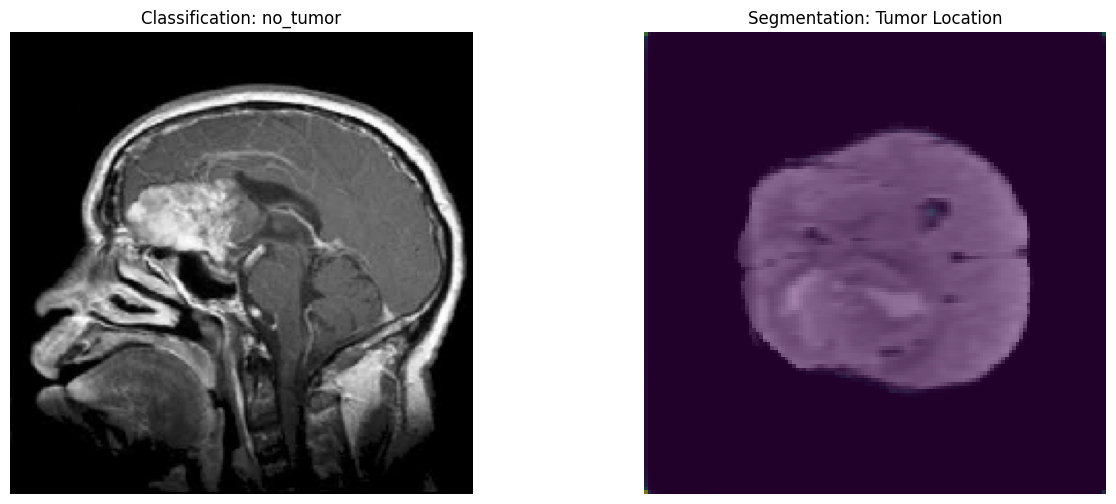

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import nibabel as nib
from skimage.transform import resize
import os

# --- Load and prepare the image for Classification ---
# Use one of the test images from your classification dataset
img_path_class = "/content/brain_tumor_classification/Testing/glioma_tumor/image(10).jpg"
img_class = image.load_img(img_path_class, target_size=(224, 224))
img_class_array = image.img_to_array(img_class)
img_class_array = np.expand_dims(img_class_array, axis=0) # Add batch dimension
img_class_array /= 255.0

# --- Load and prepare the image for Segmentation ---
# Use a .nii file from your BraTS segmentation dataset
nii_path_seg = "MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii"
seg_img = nib.load(nii_path_seg).get_fdata()

# Select a middle slice for visualization
target_slice_index = seg_img.shape[2] // 2
seg_slice = seg_img[:, :, target_slice_index]

# Resize and normalize for U-Net model
seg_slice_resized = resize(seg_slice, (128, 128), anti_aliasing=True)
seg_input = np.expand_dims(seg_slice_resized, axis=(0, -1))

# --- Load the trained models ---
# Make sure to adjust the file names if you saved them differently
# from tensorflow.keras.metrics import MeanIoU
# resnet50_model = load_model("my_resnet50_classifier.h5")
# unet_model = load_model("my_unet_segmenter.h5", custom_objects={'MeanIoU': MeanIoU})

# --- Get Predictions ---
# Get prediction from ResNet50 classifier
predictions_class = model.predict(img_class_array)
predicted_class_index = np.argmax(predictions_class)
class_labels = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
predicted_label = class_labels[predicted_class_index]

# Get prediction from U-Net segmenter
predicted_mask = unet_model.predict(seg_input)[0, :, :, 0]

# --- Visualize the Combined Results ---
plt.figure(figsize=(15, 6))

# Subplot 1: Classification
plt.subplot(1, 2, 1)
plt.imshow(img_class, cmap='gray')
plt.title(f"Classification: {predicted_label}")
plt.axis('off')

# Subplot 2: Segmentation
plt.subplot(1, 2, 2)
plt.imshow(seg_slice_resized, cmap='gray')
plt.imshow(predicted_mask, alpha=0.5, cmap='viridis')  # Overlay the mask
plt.title("Segmentation: Tumor Location")
plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


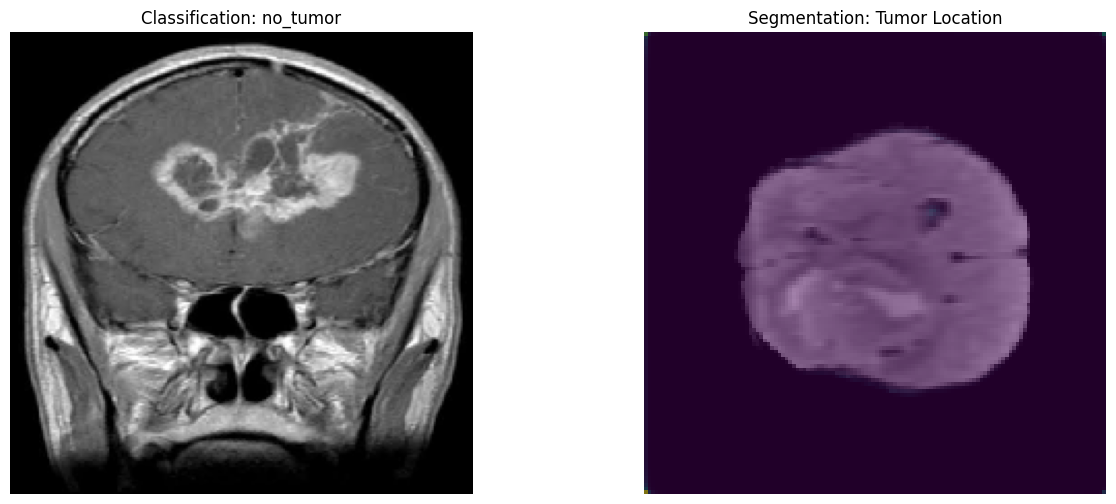

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import nibabel as nib
from skimage.transform import resize
import os

# --- Load and prepare the image for Classification ---
# Use one of the test images from your classification dataset
img_path_class = "/content/brain_tumor_classification/Testing/glioma_tumor/image(1).jpg"
img_class = image.load_img(img_path_class, target_size=(224, 224))
img_class_array = image.img_to_array(img_class)
img_class_array = np.expand_dims(img_class_array, axis=0) # Add batch dimension
img_class_array /= 255.0

# --- Load and prepare the image for Segmentation ---
# Use a .nii file from your BraTS segmentation dataset
nii_path_seg = "MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii"
seg_img = nib.load(nii_path_seg).get_fdata()

# Select a middle slice for visualization
target_slice_index = seg_img.shape[2] // 2
seg_slice = seg_img[:, :, target_slice_index]

# Resize and normalize for U-Net model
seg_slice_resized = resize(seg_slice, (128, 128), anti_aliasing=True)
seg_input = np.expand_dims(seg_slice_resized, axis=(0, -1))

# --- Load the trained models ---
# Make sure to adjust the file names if you saved them differently
# from tensorflow.keras.metrics import MeanIoU
# resnet50_model = load_model("my_resnet50_classifier.h5")
# unet_model = load_model("my_unet_segmenter.h5", custom_objects={'MeanIoU': MeanIoU})

# --- Get Predictions ---
# Get prediction from ResNet50 classifier
predictions_class = model.predict(img_class_array)
predicted_class_index = np.argmax(predictions_class)
class_labels = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
predicted_label = class_labels[predicted_class_index]

# Get prediction from U-Net segmenter
predicted_mask = unet_model.predict(seg_input)[0, :, :, 0]

# --- Visualize the Combined Results ---
plt.figure(figsize=(15, 6))

# Subplot 1: Classification
plt.subplot(1, 2, 1)
plt.imshow(img_class, cmap='gray')
plt.title(f"Classification: {predicted_label}")
plt.axis('off')

# Subplot 2: Segmentation
plt.subplot(1, 2, 2)
plt.imshow(seg_slice_resized, cmap='gray')
plt.imshow(predicted_mask, alpha=0.5, cmap='viridis')  # Overlay the mask
plt.title("Segmentation: Tumor Location")
plt.axis('off')

plt.show()